## Research reproductable: work in pairs

### Subject 2: Purchasing power of English workers from the 16th to the 19th century

This document focus on reproducing William Playfair's research. William Playfair was a Scottish engineer and political economist. He has conducted a research about the purchasing power of English workers, including the wheat price and average salaries from 1565 to 1821. The most innovative contribution of him is his method to present his data: by the histogram.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv"

In [3]:
raw_data = pd.read_csv(data_url, usecols=[1, 2, 3])
# raw_data.rename(columns = {'Wheat':'Wheat Price(shillings/quarter)', 'Wages':'Wages(shillings/week)'}, inplace=True)
# raw_data

##### Tips on data:
- Until our time, 1 pound sterling = 20 shillings, and 1 shilling = 12 pences.
- Wheat price is given in shillings per quarter, and 1 quarter = 15 British pounds = 6.8kg.
- Salaries is given in shillings per week.

#### Mission 1: Reproduce Playfair's graph

Playfair presented wheat price by bars, and salaries by a blue surface delimited by red curve. The two graphs are plotted in the same figure.

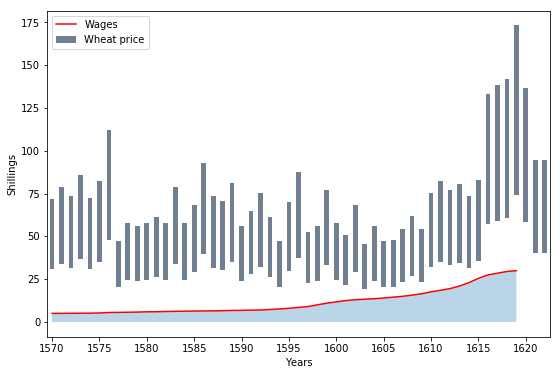

In [4]:
fig, ax = plt.subplots(1,1,figsize=(9,6))
down = 3.0*raw_data['Wheat']/4
raw_data['Wheat'].plot.bar(bottom=down, color='#708090', label='Wheat price')
ax1 = raw_data['Wages'].plot(color='red', label='Wages')
ax1.fill_between(raw_data.index,0,raw_data['Wages'], alpha=0.3 )

ax.set_ylabel('Shillings')
ax.set_xlabel('Years')
ax.set_xticklabels(raw_data['Year'])
import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.legend()

#### Mission 2: Improvement of data visulization

To improve his presentation, we use two vertical axes on the left and right respectively; and plot the two graphs ensemble.

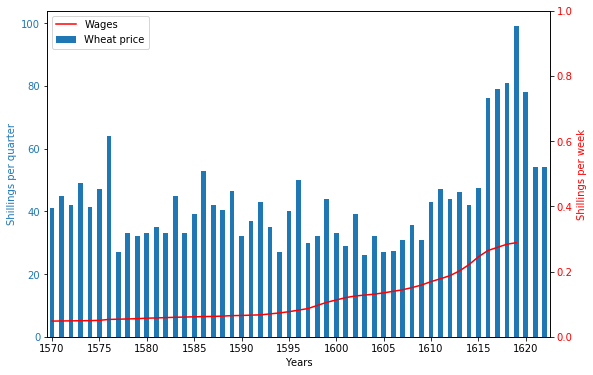

In [5]:
fig, ax1 = plt.subplots(1,1,figsize=(9,6))
ax1 = raw_data['Wheat'].plot.bar(color='#1f77b4', label='Wheat price')
ax1.set_ylabel('Shillings per quarter',color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')

ax2 = ax1.twinx()
ax1.plot(raw_data['Wages'],color='red', label='Wages')
ax2.set_ylabel('Shillings per week', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.legend()
ax1.set_xlabel('Years')
ax1.set_xticklabels(raw_data['Year'],rotation=0)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(5))

#### Mission 3: Highlight our key points

We define purchasing power as the **quantity of wheat a worker can buy with a weekly salary**, which varies with time. Playfaire wants to prove that workers' purchasing power had increased with time, and the purchasing power - year graph has also shown a trend that purchasing power is growing.

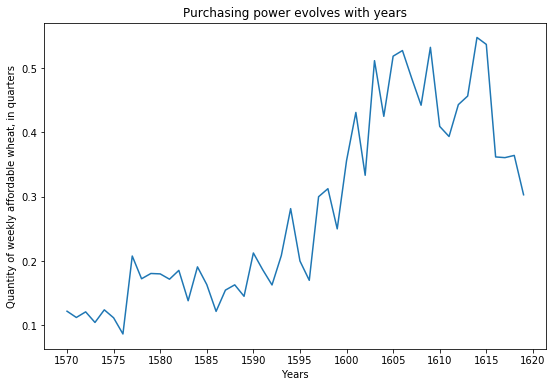

In [6]:
purchasing_power = raw_data['Wages'] / raw_data['Wheat']
fig, ax = plt.subplots(1,1,figsize=(9,6))
ax.set_title('Purchasing power evolves with years')
ax.plot(purchasing_power, label='Purchasing power')
ax.set_xlabel('Years')
ax.set_ylabel('Quantity of weekly affordable wheat, in quarters')
ax.set_xticklabels(raw_data['Year'],rotation=0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

Think about another method to present the advancement of time, to prove that workers' purchasing power increasing with time: applying a **10 years mean on purchasing power**, so we can see it works better or not?

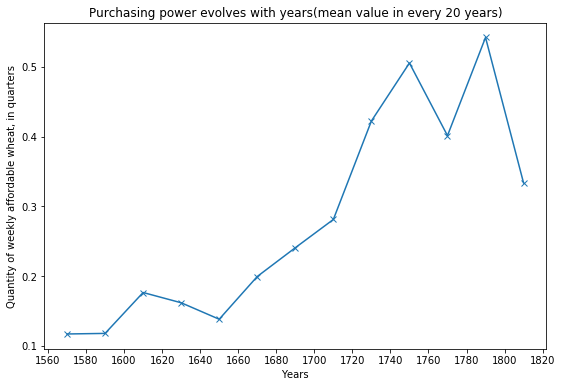

In [7]:
year_mean = []
purchasing_power_mean = []

mean_interval = 20 # interval in years, for calculating mean purchasing power
m_i = mean_interval//5

for i in raw_data.index:
    j = int(i)
    if j%m_i == 1:
        p_mean = (purchasing_power[j] + purchasing_power[j-1])/2.0
        purchasing_power_mean.append(p_mean)
        year_mean.append(raw_data['Year'][j])

fig, ax = plt.subplots(1,1,figsize=(9,6))
ax.plot(year_mean, purchasing_power_mean, '-x', label='Purchasing power')
ax.set_title('Purchasing power evolves with years(mean value in every 20 years)')
ax.set_xlabel('Years')
ax.set_ylabel('Quantity of weekly affordable wheat, in quarters')
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))